## Algoritmo genético

gen	nevals	avg       	std     	min     	max    
0  	300   	0.00893193	0.249402	-1.30931	2.22724
1  	201   	0.0627442 	0.238939	-1.27823	1.53976
2  	190   	0.139569  	0.320277	-0.89569	2.44334
3  	176   	0.221951  	0.452171	-1.18752	3.43741
4  	164   	0.346631  	0.631958	-1.37605	3.43741
5  	156   	0.589036  	0.790239	-1.3772 	3.76284
6  	189   	0.998558  	1.11775 	-1.37486	3.76284
7  	187   	1.74454   	1.26814 	-1.26447	3.76284
8  	190   	2.67035   	1.08847 	-1.36752	3.7834 
9  	178   	3.36902   	0.688299	-0.890512	3.78757
10 	186   	3.5917    	0.578439	-0.98774 	3.78757
11 	189   	3.6575    	0.642977	-1.08457 	3.78761
12 	174   	3.72713   	0.409092	-1.08566 	3.78765
13 	168   	3.61739   	0.76316 	-1.08334 	3.78767
14 	164   	3.68898   	0.526251	-0.076852	3.78767
15 	168   	3.70363   	0.521429	-1.04243 	3.78768
16 	187   	3.73482   	0.394976	-0.0549404	3.78768
17 	165   	3.68929   	0.58999 	-1.08123  	3.78768
18 	166   	3.68385   	0.624531	-1.02589  	3.78768
19 	177   	3.6764    	0.636

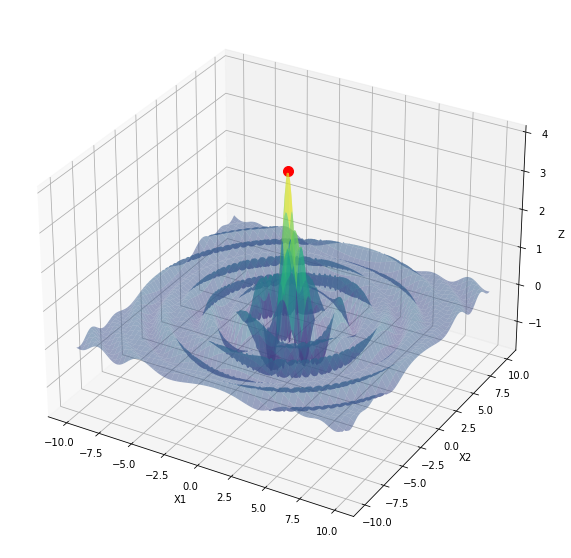

Best individual: (3.787680769833837,)


In [7]:
from deap import base, creator, tools, algorithms
import random
import math
import numpy as np

npop = 300

creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
toolbox.register("attr_float", random.uniform, -10, 10)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, n=2)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

def eval_func(individual):
    X1, X2 = individual
    Z1 = math.sqrt(X1**2 + X2**2)
    Z2 = math.sqrt((X1 - 1)**2 + (X2 + 1)**2)
    return (math.sin(4 * Z1) / Z1) + (math.sin(2.5 * Z2) / Z2),

toolbox.register("evaluate", eval_func)
toolbox.register("mate", tools.cxBlend, alpha=0.5)
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=1, indpb=0.1)
toolbox.register("select", tools.selTournament, tournsize=3)


pop = toolbox.population(n=npop)
hof = tools.HallOfFame(1)
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", np.mean)
stats.register("std", np.std)
stats.register("min", np.min)
stats.register("max", np.max)

pop, log = algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.2, ngen=10*npop, stats=stats, halloffame=hof, verbose=True)

print(f"Pop: {pop}")
print(f"Log: {log}")
print(f"Hof (X1 e X2): {hof}")

# 3D Plot the function overlapped with the best individual
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

X1 = np.arange(-10, 10, 0.1)
X2 = np.arange(-10, 10, 0.1)
X1, X2 = np.meshgrid(X1, X2)
Z1 = np.sqrt(X1**2 + X2**2)
Z2 = np.sqrt((X1 - 1)**2 + (X2 + 1)**2)
Z = (np.sin(4 * Z1) / Z1) + (np.sin(2.5 * Z2) / Z2)

ax.plot_surface(X1, X2, Z, cmap='viridis', edgecolor='none', alpha=0.5)
ax.scatter(hof[0][0], hof[0][1], hof[0].fitness.values, c='r', marker='o', s=100)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Z')
plt.show()

# comparing this value with the best individual
print(f"Best individual: {hof[0].fitness.values}")



## Particle Swarm Optimization

2023-06-20 21:54:21,969 - pyswarms.single.global_best - INFO - Optimize for 10000 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9, 'k': 30, 'p': 2}
pyswarms.single.global_best:   0%|          |0/10000, best_cost=-3.79

pyswarms.single.global_best: 100%|██████████|10000/10000, best_cost=-3.79
2023-06-20 21:54:28,270 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -3.787680769833837, best pos: [ 0.0582617 -0.0582617]


Maximum value X1 = 0.058261701805316146, X2 = -0.058261701777832936


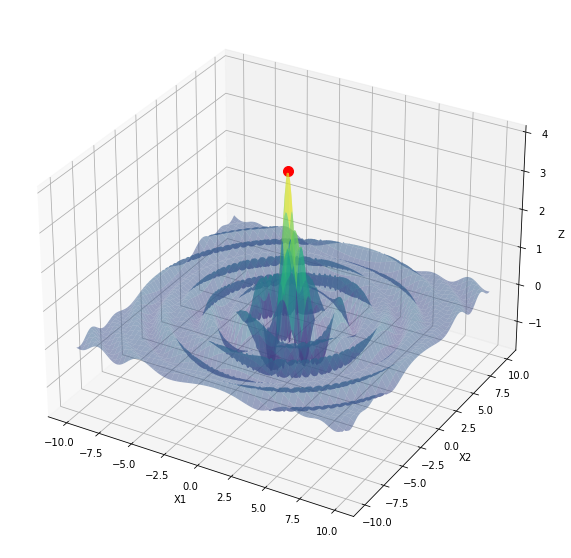

In [18]:
import numpy as np
import pyswarms as ps
from pyswarms.utils.functions import single_obj as fx


# Define the function
def f1(X):
    X1, X2 = X[:,0], X[:,1]
    Z1 = np.sqrt(X1**2 + X2**2)
    Z2 = np.sqrt((X1 - 1)**2 + (X2 + 1)**2)
    # minimize bcs PSO is for minimization problems
    return -(np.sin(4 * Z1) / Z1) - (np.sin(2.5 * Z2) / Z2) 

# Setup hyperparameters
options = {'c1': 0.5, 'c2': 0.3, 'w':0.9, 'k': 30, 'p':2}

optimizer = ps.single.GlobalBestPSO(n_particles=100, dimensions=2, options=options)

# Optimization
best_cost, best_pos = optimizer.optimize(f1, iters=10000)

print(f"Maximum value X1 = {best_pos[0]}, X2 = {best_pos[1]}")

# 3D Plot the function overlapped with the best individual
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

X1 = np.arange(-10, 10, 0.1)
X2 = np.arange(-10, 10, 0.1)
X1, X2 = np.meshgrid(X1, X2)

Z1 = np.sqrt(X1**2 + X2**2)
Z2 = np.sqrt((X1 - 1)**2 + (X2 + 1)**2)
# minimize bcs PSO is for minimization problems
Z = (np.sin(4 * Z1) / Z1) + (np.sin(2.5 * Z2) / Z2) 

def z(x1, x2):
    def z1(x1, x2):
        return np.sqrt(x1**2 + x2**2)
    def z2(x1, x2):
        return np.sqrt((x1 - 1)**2 + (x2 + 1)**2)
    return (np.sin(4 * z1(x1, x2)) / z1(x1, x2)) + (np.sin(2.5 * z2(x1, x2)) / z2(x1, x2))

ax.plot_surface(X1, X2, Z, cmap='viridis', edgecolor='none', alpha=0.5)
ax.scatter(best_pos[0], best_pos[1], z(best_pos[0], best_pos[1]), c='r', marker='o', s=100)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Z')
plt.show()


